# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Data/fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Dimensions
df.shape

(17880, 18)

This data set has 17880 rows, 18 columns.

- job_id
- title
- location
- department
- salary_range
- company_profile
- description
- requirements
- benefit
- telecommuting
- has_company_logo
- has_question
- employment_type
- required_experience
- required_education
- industry
- function
- fraudulent

In [6]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

There are 800 fake job posts in the dataset. Most of the data is catgorical/textual data.

In [7]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [23]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.corr(numeric_only=True)

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


# Dealing with missing values

In [8]:
# Check for missing values
df.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
# Percentage of missing values by column
df.isnull().sum() / df.shape[0] * 100


job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

Columns with highest percentage of missing values:
- Department
- Salary Range 
- Benefits
- Required Education
- Required Experience



In [10]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
# Replace missing values with 'Missing' for textual columns
columns_with_text = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[columns_with_text] = df[columns_with_text].fillna('Missing')
df.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile            0
description                0
requirements               0
benefits                   0
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [12]:
# Fill categorical columns with placeholders

df['location'].fillna('Unknown', inplace=True)
df['department'].fillna('Unknown', inplace=True)
df['salary_range'].fillna('Not Specified', inplace=True)
df['employment_type'].fillna('Not Specified', inplace=True)
df['required_education'].fillna('Not Specified', inplace=True)
df['required_experience'].fillna('Not Specified', inplace=True)
df['industry'].fillna('Not Specified', inplace=True)
df['function'].fillna('Unknown', inplace=True)

# Check for missing values again
df.isnull().sum()



/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_23690/3732098871.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Unknown', inplace=True)
/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_23690/3732098871.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [13]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Exploring Fradulent Job Postings

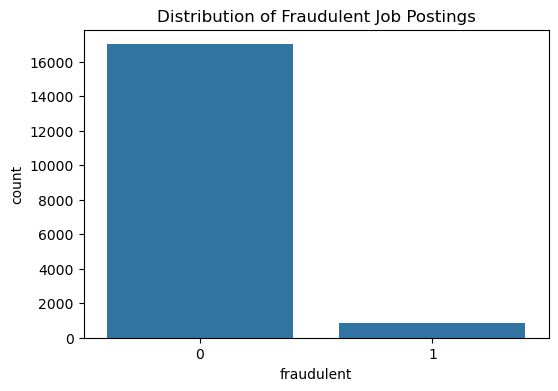

In [14]:

plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

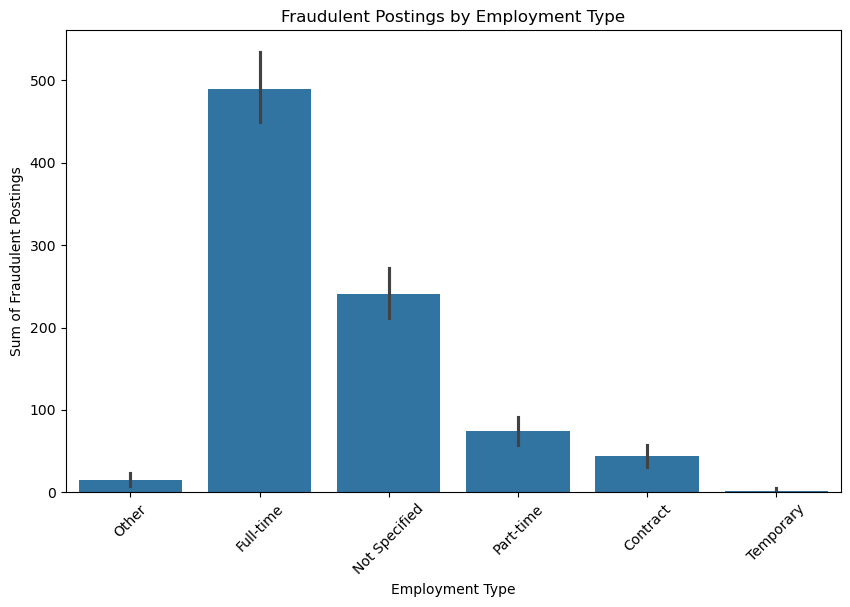

In [15]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()


Most fraudulent job postings are listed asfull-time jobs.

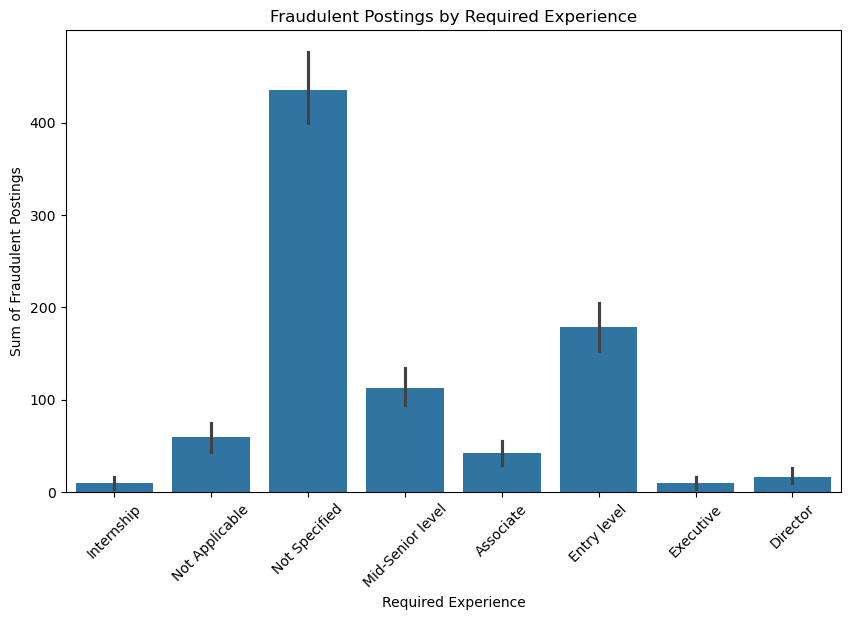

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='required_experience', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

Most fraudulent job postings don't specify the required experience or target entry-level candidates.

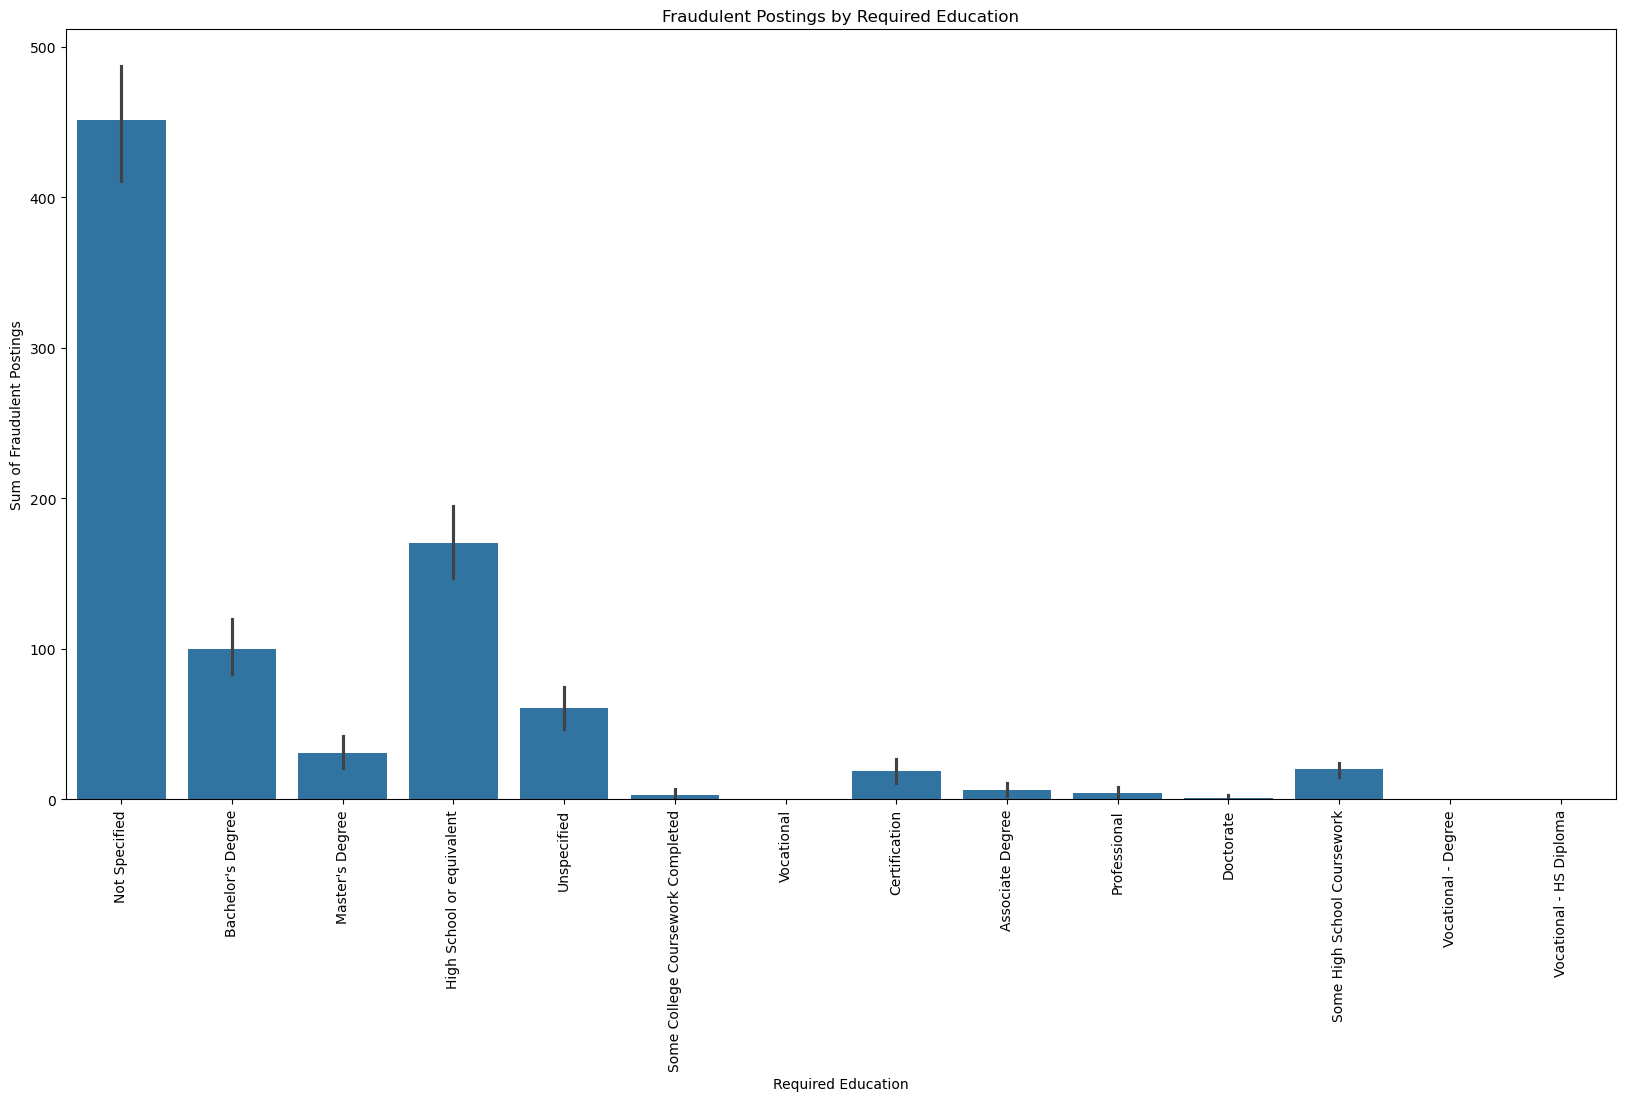

In [17]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation = 90)
plt.show()

Most fraudulent job postings don't specify the required education or target candidates with a high school diploma or GED.

In [18]:
# Explore what fraudulent job postings descriptions look like
df[df['fraudulent'] == True]['description'].iloc[0]


'IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:\xa0Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies saf

In [19]:
df[df['fraudulent'] == True]['description'].iloc[100]


'We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Service Representative position would be perfect for you!- Set your own hours - Make money every time you decide to work - Work remotely from home - Get paid weekly - If you have a computer with internet, this is for you'

# Cleaning the Data - Text Preprocessing

NLTK isn't working so I'll do manual preprocessing

In [20]:
import re 
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase first
        text = text.lower()
        
        # Remove HTML tags and entities
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'&\w+;', '', text)
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        
        # Remove digits
        text = re.sub(r'\d+', '', text)
        
        # Remove special characters while preserving spaces
        text = re.sub(r'[^\w\s]', ' ', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        
        # Strip leading and trailing whitespace
        text = text.strip()
        
        return text
    else:
        return ''

In [21]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

In [22]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,marketing intern,"US, NY, New York",Marketing,Not Specified,we re food and we ve created a groundbreaking ...,food a fast growing james beard award winning ...,experience with content management systems a m...,missing,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0
1,2,customer service cloud video production,"NZ, , Auckland",Success,Not Specified,seconds the worlds cloud video production serv...,organised focused vibrant awesome do you have ...,what we expect from you your key responsibilit...,what you will get from usthrough being part of...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0
2,3,commissioning machinery assistant cma,"US, IA, Wever",Unknown,Not Specified,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement pre commissioning and commissioning ...,missing,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Unknown,0
3,4,account executive washington dc,"US, DC, Washington",Sales,Not Specified,our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelor s or master s in gis busine...,our culture is anything but corporate we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,bill review manager,"US, FL, Fort Worth",Unknown,Not Specified,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualifications rn license in the state of texa...,full benefits offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
